In [34]:
# A simple bot with no memory

from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage

In [35]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

In [36]:
llm = ChatOllama(base_url="http://localhost:11434/", model="tinyllama:1.1b")

In [37]:
def agent_bot(state: AgentState) -> AgentState:
    response = llm.invoke(state['messages'])
    print(f"\nAI: {response.content}")
    return state


In [38]:
graph = StateGraph(AgentState)
graph.add_node("call_llm", agent_bot)
graph.add_edge(START, "call_llm")
graph.add_edge("call_llm", END)
agent = graph.compile()

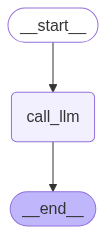

In [39]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [40]:
response = agent.invoke({
    "messages": [HumanMessage(content="Hi, I'm Valli. Who are you?")]
})
# print(response)


AI: Hi, I'm AI. I'm a chatbot that uses natural language processing to understand human speech and respond accordingly. However, as an artificial intelligence, I can only exist in digital form.
